#  Applied Machine Learning 

## Homework 5: Evaluation metrics


## Imports

In [1]:
import os
import re
import sys
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tests_hw5
from sklearn import datasets
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
    ConfusionMatrixDisplay
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import seaborn as sns

sns.set(rc={'figure.figsize': (10, 8)})


In [2]:
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

<br><br>

## Exercise 1: Precision, recall, and f1 score by hand <a name="1"></a>
<hr>

Consider the problem of predicting whether a patient has a disease or not. Below are confusion matrices of two machine learning models: Model A and Model B. 

- Model A

|    Actual/Predicted      | Predicted disease | Predicted no disease |
| :------------- | -----------------------: | -----------------------: |
| **Actual disease**       | 2 | 8 |
| **Actual no disease**       | 0 | 100 |


- Model B

|    Actual/Predicted      | Predicted disease | Predicted no disease |
| :------------- | -----------------------: | -----------------------: |
| **Actual disease**       | 6 | 4 |
| **Actual no disease**       | 10 | 90 |

### 1.1 Positive vs. negative class 
rubric={points:2}

**Your tasks:**

Precision, recall, and f1 score depend upon which class is considered "positive", that is the thing you wish to find. In the example above, which class is likely to be the "positive" class? Why? 

In [3]:
#MODEL :1
TPA = 2
FPA = 0
TNA = 100
FNA = 8



In [4]:
recall_A = TPA / (TPA + FNA)
print(f'The recll value is : {recall_A}')

precision_A = TPA / (TPA + FPA)
print(f'The precision value is :{precision_A}')

f1_score_A = (2 * precision_A * recall_A) / (precision_A + recall_A)
print(f'The f1_score value is :{f1_score_A}') 


Total_A =TPA + TNA + FPA + FNA
Total_prediction_A = TPA + TNA

Total_A

The recll value is : 0.2
The precision value is :1.0
The f1_score value is :0.33333333333333337


110

In [5]:
#MODEL : 2
TPB = 6
FPB = 10
TNB = 90
FNB = 4



In [6]:
recall_B = TPB / (TPB + FNB)
print(f'The recll value is : {recall_B}')

precision_B = TPB / (TPB + FPB)
print(f'The precision value is :{precision_B}')

f1_score_B = (2 * precision_B * recall_B)/ (precision_B + recall_B)
print(f'The f1_score value is :{f1_score_B}') 



Total_B =(TPB + TNB + FPB + FNB)
Total_prediction_B = (TPB + TNB)

The recll value is : 0.6
The precision value is :0.375
The f1_score value is :0.4615384615384615


<br><br>

### 1.2 Accuracy
rubric={points:2}

**Your tasks:**

Calculate accuracies for Model A and Model B. 

We'll store all metrics associated with Model A and Model B in the `results_dict` below. 

In [7]:
results_dict = {"A": {}, "B": {}}

In [8]:
results_dict["A"]["accuracy"] = Total_prediction_A / Total_A
results_dict["B"]["accuracy"] = Total_prediction_B / Total_B

In [9]:
assert tests_hw5.ex1_2_1(
    results_dict["A"]["accuracy"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [10]:
assert tests_hw5.ex1_2_2(
    results_dict["B"]["accuracy"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [11]:
pd.DataFrame(results_dict)

,A,B
accuracy,0.927273,0.872727


<br><br>

### 1.3 Which model would you pick? 
rubric={points:1}

**Your tasks:**

Which model would you pick simply based on the accuracy metric? 

In [12]:
# i will pic  model B .

<br><br>

### 1.4 Precision, recall, f1-score
rubric={points:6}

**Your tasks:**

1. Calculate precision, recall, f1-score for Model A and Model B manually, without using `scikit-learn` tools. 


In [13]:
results_dict["A"]["precision_A"] =  TPA / (TPA + FPA)
results_dict["B"]["precision_B"] = TPB / (TPB + FPB)
results_dict["A"]["recall_A"] = TPA / (TPA + FNA)
results_dict["B"]["recall_B"] =  TPB / (TPB + FNB)
results_dict["A"]["f1_A"] = (2 * precision_A * recall_A)/ (precision_A + recall_A)
results_dict["B"]["f1_B"] =(2 * precision_B * recall_B)/ (precision_B + recall_B)




In [14]:
assert tests_hw5.ex1_4_1(
    results_dict["A"]["precision_A"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [15]:
assert tests_hw5.ex1_4_2(
    results_dict["B"]["precision_B"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [16]:
assert tests_hw5.ex1_4_3(
    results_dict["A"]["recall_A"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [17]:
assert tests_hw5.ex1_4_4(
    results_dict["B"]["recall_B"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [18]:
assert tests_hw5.ex1_4_5(
    results_dict["A"]["f1_A"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [19]:
assert tests_hw5.ex1_4_6(
    results_dict["B"]["f1_B"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


Show the dataframe with all results. 

In [20]:
pd.DataFrame(results_dict)

,A,B
accuracy,0.927273,0.872727
precision_A,1.000000,NaN
recall_A,0.200000,NaN
f1_A,0.333333,NaN
precision_B,NaN,0.375000
recall_B,NaN,0.600000
f1_B,NaN,0.461538


<br><br>

### 1.5 Discussion
rubric={points:4}

**Your tasks:**
1. Which metric is more informative in this problem? Why? 
2. Which model would you pick based on this information? 

In [21]:
#ANS:1) model B are good for informative in this problem beacuse in real world if human have no disease it good for peasant
# else human have a disease it very Dangerous .

In [22]:
#ANS:2) i prosonly pic model B beacuse i explain on answer 1.

<br><br>

### (Optional) 1.6 
rubric={points:1}

**Your tasks:**

Provide 4 to 5 example classification datasets (with links) where accuracy metric would be misleading. Discuss which evaluation metric would be more appropriate for each dataset. You may consider datasets we have used in this course so far. You could also look up datasets on Kaggle. 

<br><br><br><br>

### Exercise 2: Classification evaluation metrics using `sklearn` <a name="2"></a>
<hr>

In general, when a dataset is imbalanced, accuracy does not provide the whole story. In class, we looked at credit card fraud dataset which is a classic example of an imbalanced dataset. 

Another example is customer churn datasets. [Customer churn](https://en.wikipedia.org/wiki/Customer_attrition) refers to the notion of customers leaving a subscription service like Netflix. In this exercise, we will try to predict customer churn in a dataset where most of the customers stay with the service and a small minority cancel their subscription. To start, please download the [Kaggle telecom customer churn dataset](https://www.kaggle.com/becksddf/churn-in-telecoms-dataset). Once you have the data, you should be able to run the following code:

The starter code below reads the data CSV as a pandas dataframe and splits it into 70% train and 30% test. 

Note that `churn` column in the dataset is the target. "True" means the customer left the subscription (churned) and "False" means they stayed.

> Note that for this kind of problem a more appropriate technique is something called survival analysis and we'll be talking about it later in the course. For now, we'll just treat it as a binary classification problem. 

In [23]:
df = pd.read_csv("bigml_59c28831336c6604c800002a.csv", encoding="utf-8")
df.churn = df.churn.map({True:1,False:0})
train_df, test_df = train_test_split(df, test_size=0.3, random_state=123)
train_df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
1402,NE,70,415,421-8535,no,no,0,213.4,86,36.28,...,77,17.40,256.6,101,11.55,5.7,4,1.54,1,0
1855,WI,67,510,417-2265,no,no,0,109.1,134,18.55,...,76,12.10,91.2,86,4.10,10.9,5,2.94,2,0
633,NJ,122,415,327-9341,no,yes,34,146.4,104,24.89,...,103,7.62,220.0,91,9.90,15.6,4,4.21,2,0
1483,NV,107,510,419-9688,yes,no,0,234.1,91,39.80,...,105,13.86,282.5,100,12.71,10.0,3,2.70,1,0
2638,HI,105,510,364-8128,no,no,0,125.4,116,21.32,...,95,22.23,241.6,104,10.87,11.4,9,3.08,2,0


In [24]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [25]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y, test_size=0.25, random_state=42)

<br><br>

### 2.1 Distribution of target values
rubric={points:4}

**Your tasks:**

Examine the distribution of target values in the train split. Do you see class imbalance? If yes, do we need to deal with it? Why or why not? 

In [26]:
train_df.churn.value_counts()

0    1984
1     349
Name: churn, dtype: int64

<br><br>

### (Optional) 2.2 EDA 
rubric={points:1}

**Your tasks:**

Come up with **two** exploratory questions you would like to answer and explore those. Briefly discuss your results in 1-3 sentences.

You are welcome to use `pandas_profiling` (see Lecture 10) but you don't have to.

### Quetion (1) describe all   custmor's  charge a day ,night ,eveing?

- Here, we can see most of the customers' charge is around 30 +/- 10.

<AxesSubplot:xlabel='total day charge', ylabel='Count'>

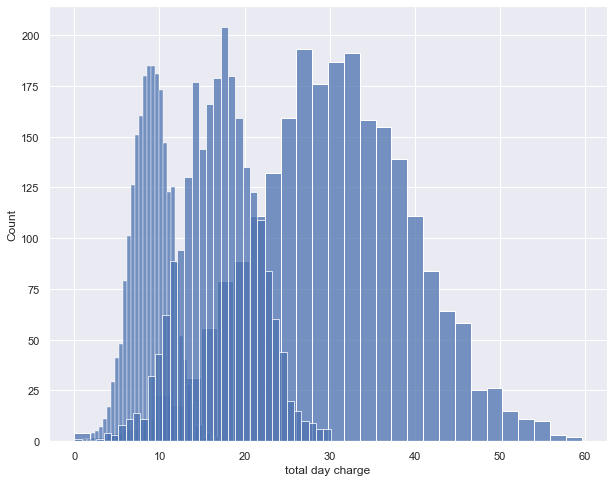

In [27]:
import seaborn as sns

sns.histplot(data=train_df, x="total day charge") 

sns.histplot(data=train_df, x="total night charge")

sns.histplot(data=train_df, x="total eve charge")


### Quetion 2) describe a dataset in how many account Minimum and Maxmium account lenth are distribution in game.


In [28]:
train_df["account length"].min(),train_df["account length"].max()

(1, 243)

<AxesSubplot:xlabel='account length', ylabel='Count'>

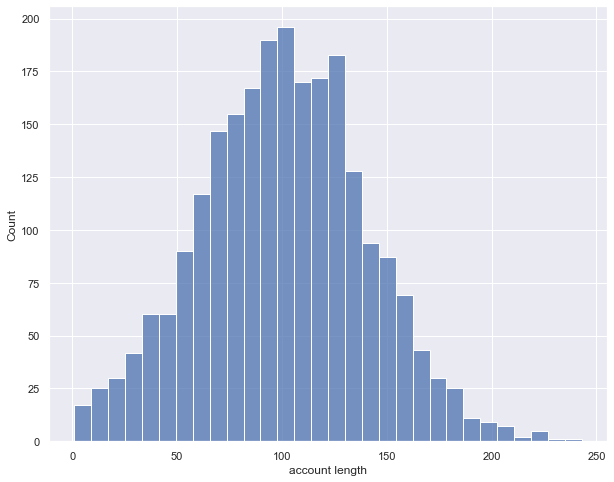

In [29]:
sns.histplot(data=train_df,x="account length")

## Quetion :3)  Describe all user  each state we are staying?



<br><br>

### 2.3 Column transformer 
rubric={points:10}

The code below creates `X_train`, `y_train`, `X_test`, `y_test` for you. 
In preparation for building a classifier, set up a `ColumnTransformer` that performs whatever feature transformations you deem sensible. This can include dropping features if you think they are not helpful. Remember that by default `ColumnTransformer` will drop any columns that aren't accounted for when it's created.

In each case, briefly explain your rationale with 1-2 sentences. You do not need an explanation for every feature, but for every group of features that are being transformed the same way. For example, "I am doing transformation X to the following categorical features: `a`, `b`, `c` because of reason Y," etc.

In [30]:
X_train = train_df.drop(columns=["churn"])
X_test = test_df.drop(columns=["churn"])

y_train = train_df["churn"]
y_test = test_df["churn"]

In [31]:
train_df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
1402,NE,70,415,421-8535,no,no,0,213.4,86,36.28,...,77,17.40,256.6,101,11.55,5.7,4,1.54,1,0
1855,WI,67,510,417-2265,no,no,0,109.1,134,18.55,...,76,12.10,91.2,86,4.10,10.9,5,2.94,2,0
633,NJ,122,415,327-9341,no,yes,34,146.4,104,24.89,...,103,7.62,220.0,91,9.90,15.6,4,4.21,2,0
1483,NV,107,510,419-9688,yes,no,0,234.1,91,39.80,...,105,13.86,282.5,100,12.71,10.0,3,2.70,1,0
2638,HI,105,510,364-8128,no,no,0,125.4,116,21.32,...,95,22.23,241.6,104,10.87,11.4,9,3.08,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154,WY,126,408,339-9798,yes,no,0,197.6,126,33.59,...,112,20.95,285.3,104,12.84,12.5,8,3.38,2,0
3089,WV,70,510,348-3777,no,yes,30,143.4,72,24.38,...,92,14.45,127.9,68,5.76,9.4,4,2.54,3,0
1766,NJ,125,415,406-6400,no,no,0,182.3,64,30.99,...,121,11.88,171.6,96,7.72,11.6,7,3.13,2,0
1122,NE,159,415,362-5111,no,no,0,189.1,105,32.15,...,147,20.92,242.0,106,10.89,10.4,5,2.81,1,1


In [32]:
train_df.shape

(2333, 21)

In [33]:
train_df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [34]:
numerical_feats = [
                   "account length", 
                   "number vmail messages", 
                   "total day minutes", 
                   "total day calls", 
                   "total day charge", 
                   "total eve minutes", 
                   "total eve calls",
                   "total eve charge", 
                   "total night minutes", 
                   "total night calls", 
                   "total intl calls", 
                   "total intl charge",
                   "customer service calls"]  # apply scaling
categorical_feats = [
                     "state",
                     "area code"]  # apply one-hot encoding
binary_feats = [
                "international plan",
                "voice mail plan"]
passthrough_feats = []  # do not apply any transformation
drop_feats = [
              "phone number"]

In [35]:
mct = make_column_transformer(
    (make_pipeline(SimpleImputer(), StandardScaler()),numerical_feats,),
    (OneHotEncoder(handle_unknown="ignore", sparse=False),categorical_feats,),  # OHE on categorical features
    (OneHotEncoder(drop="if_binary", dtype=int),binary_feats,),  
    ("drop", drop_feats),
    ("passthrough", passthrough_feats),
)


<br><br>

### 2.4 Visualizing the transformed data 
rubric={points:4}

Fit and transform your `ColumnTransformer` on your training set. Print the first 5 rows of the transformed data as a dataframe (not numpy array). See lecture 10 for code that can get you the new column names after transforming. 

In [36]:
column_transformed = mct.fit_transform(X_train)


In [37]:
#for Column Tranform:
column_names = (
    numerical_feats
    + mct.named_transformers_["onehotencoder-1"].get_feature_names_out().tolist()
    + mct.named_transformers_["onehotencoder-2"].get_feature_names_out().tolist()
    + passthrough_feats
)
column_names

['account length',
 'number vmail messages',
 'total day minutes',
 'total day calls',
 'total day charge',
 'total eve minutes',
 'total eve calls',
 'total eve charge',
 'total night minutes',
 'total night calls',
 'total intl calls',
 'total intl charge',
 'customer service calls',
 'state_AK',
 'state_AL',
 'state_AR',
 'state_AZ',
 'state_CA',
 'state_CO',
 'state_CT',
 'state_DC',
 'state_DE',
 'state_FL',
 'state_GA',
 'state_HI',
 'state_IA',
 'state_ID',
 'state_IL',
 'state_IN',
 'state_KS',
 'state_KY',
 'state_LA',
 'state_MA',
 'state_MD',
 'state_ME',
 'state_MI',
 'state_MN',
 'state_MO',
 'state_MS',
 'state_MT',
 'state_NC',
 'state_ND',
 'state_NE',
 'state_NH',
 'state_NJ',
 'state_NM',
 'state_NV',
 'state_NY',
 'state_OH',
 'state_OK',
 'state_OR',
 'state_PA',
 'state_RI',
 'state_SC',
 'state_SD',
 'state_TN',
 'state_TX',
 'state_UT',
 'state_VA',
 'state_VT',
 'state_WA',
 'state_WI',
 'state_WV',
 'state_WY',
 'area code_408',
 'area code_415',
 'area code_51

In [38]:
pd.DataFrame(data=column_transformed,columns=column_names)

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,...,state_VT,state_WA,state_WI,state_WV,state_WY,area code_408,area code_415,area code_510,international plan_yes,voice mail plan_yes
0,-0.767893,-0.587624,0.618769,-0.721211,0.618927,0.069871,-1.156734,0.069926,1.088667,0.052115,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.843585,-0.587624,-1.293778,1.655252,-1.293517,-1.167277,-1.207278,-1.166291,-2.162302,-0.720990,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.544113,1.900976,-0.609809,0.169963,-0.609654,-2.210130,0.157417,-2.211244,0.369287,-0.463288,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.165650,-0.587624,0.998345,-0.473663,0.998611,-0.754894,0.258506,-0.755774,1.597736,0.000574,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.115188,-0.587624,-0.994886,0.764078,-0.994731,1.195994,-0.246937,1.196515,0.793839,0.206736,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2328,0.645037,-0.587624,0.329045,1.259175,0.328771,0.898602,0.612316,0.897957,1.652771,0.206736,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2329,-0.767893,1.608200,-0.664820,-1.414346,-0.664665,-0.618094,-0.398570,-0.618157,-1.440956,-1.648715,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2330,0.619806,-0.587624,0.048489,-1.810423,0.048322,-1.216842,1.067214,-1.217606,-0.582024,-0.205587,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2331,1.477656,-0.587624,0.173180,0.219472,0.173445,0.890672,2.381365,0.890960,0.801701,0.309816,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


<br><br>

### 2.5 area code feature
rubric={points:4}

The original dataset had a feature called `area code`. Let's assume we encoded this feature with one-hot encoding.

1. The area codes were numbers to begin with. Why do we want to use one-hot encoding on this feature?
- beacuse there are only 3 Uninque value in  `area code` and also a categorical feature  instead of a Numeric Feature. 
2. What were the possible values of `area code`? 
- A possible values of  `area code` is arry[415,510,408].
3. What new feature(s) were created to replace `area code`? 
- 'area code_408','area code_415','area code_510'

In [39]:
X_train["area code"].unique()

array([415, 510, 408], dtype=int64)

<br><br>

### 2.6 Dummy classifier
rubric={points:4}

**Your tasks:**

Create a `DummyClassifier`. Report the following scoring metrics via cross-validation: accuracy, precision, recall, f1-score. Briefly comment on your results, including any warnings the code produces (2 sentences max).

In [40]:
y_train

1402    0
1855    0
633     0
1483    0
2638    0
       ..
2154    0
3089    0
1766    0
1122    1
1346    1
Name: churn, Length: 2333, dtype: int64

In [41]:
Dc = DummyClassifier()

scoring= ["accuracy", "precision","recall","f1"]

Dummy_pipe = make_pipeline(mct,Dc)

pd.DataFrame(cross_validate(Dummy_pipe,X_train,y_train,scoring=scoring,return_train_score=True))




C:\Users\Smit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Smit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Smit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Smit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is i

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,0.015574,0.008084,0.850107,0.850482,0.0,0.0,0.0,0.0,0.0,0.0
1,0.009995,0.003010,0.850107,0.850482,0.0,0.0,0.0,0.0,0.0,0.0
2,0.012118,0.003112,0.850107,0.850482,0.0,0.0,0.0,0.0,0.0,0.0
3,0.008024,0.008656,0.851931,0.850027,0.0,0.0,0.0,0.0,0.0,0.0
4,0.009667,0.004998,0.849785,0.850562,0.0,0.0,0.0,0.0,0.0,0.0


<br><br>

### 2.7 Logistic regression
rubric={points:8} 

**Your tasks:**

1. Train and score a logistic regression classifier on the dataset. 
2. Report the same metrics as in the previous part.
3. Are you satisfied with the results? Use your `DummyClassifier` results as a reference point. Discuss in a few sentences. 

### 1. Train and score a logistic regression classifier on the dataset. 

In [42]:
lr = LogisticRegression()

pipe_lr = make_pipeline(mct,lr)

result = cross_validate(pipe_lr,X_train,y_train,scoring=scoring,cv=5,return_train_score=True)

pd.DataFrame(result)

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,0.039846,0.003026,0.869379,0.864416,0.666667,0.630000,0.257143,0.225806,0.371134,0.332454
1,0.032199,0.008013,0.852248,0.868167,0.520000,0.654206,0.185714,0.250896,0.273684,0.362694
2,0.032769,0.009895,0.850107,0.867095,0.500000,0.639640,0.171429,0.254480,0.255319,0.364103
3,0.029874,0.009994,0.869099,0.863953,0.642857,0.620370,0.260870,0.239286,0.371134,0.345361
4,0.035977,0.010199,0.839056,0.868773,0.413793,0.651786,0.171429,0.261649,0.242424,0.373402


#### 3. Are you satisfied with the results? Use your `DummyClassifier` results as a reference point. Discuss in a few sentences. 

- Answer :  we get a satisfied this result a accuracy as compared to the`DummyClassifier`, so we can consider this model and also we can see its precision is high but recall is very low.

<br><br>

### 2.8 Logistic regression with `class_weight`
rubric={points:6}

**Your tasks:**

1. Set the `class_weight` parameter of your logistic regression model to `'balanced'` and report the same metrics as in the previous part. 
2. Do you prefer this model to the one in the previous part? Discuss your results in a few sentences.

In [43]:
lr = LogisticRegression(class_weight="balanced")

pipe_lr = make_pipeline(mct,lr)

result = cross_validate(pipe_lr,X_train,y_train,scoring=scoring,cv=5,return_train_score=True)

pd.DataFrame(result)

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,0.043902,0.006016,0.785867,0.769561,0.380952,0.369151,0.685714,0.763441,0.489796,0.497664
1,0.035728,0.004017,0.768737,0.771168,0.366197,0.372852,0.742857,0.777778,0.490566,0.504065
2,0.040372,0.007561,0.764454,0.774384,0.348485,0.378007,0.657143,0.788530,0.455446,0.511034
3,0.040372,0.006253,0.751073,0.778790,0.340136,0.384348,0.724638,0.789286,0.462963,0.516959
4,0.034881,0.008391,0.733906,0.786824,0.320000,0.395797,0.685714,0.810036,0.436364,0.531765


### 2).Do you prefer this model to the one in the previous part? Discuss your results in a few sentences.

- Answer: here ,  the second model are compred to the this model beacuse F1-score  incresed  as compered  to provied model so therefore we should  work with  the latter Model  of  `class_weight` = balance incresed of thh defult Class-whight.

<br><br>

### 2.9 Hyperparameter optimization
rubric={points:10}

Now let's tune the hyperparameters of our `LogisticRegression` using `GridSearchCV` to maximize cross-validation f1 score. 

**Your tasks:**

1. Jointly optimize `C` (choose some reasonable values) and `class_weight` (`None` vs. `'balanced'`) with `GridSearchCV` and `scoring="f1"`. 
2. What values of `C` and `class_weight` are chosen and what is the best cross-validation f1 score?

In [44]:
param_grid = {"logisticregression__C":[0.001,0.01,0.1,1,10,100],
              "logisticregression__class_weight" : [None,"blance"]}

pipe_lr = make_pipeline(mct,LogisticRegression(max_iter=1000))

gcv = GridSearchCV(pipe_lr,param_grid,scoring="f1",cv=5,return_train_score=True)

gcv.fit(X_train,y_train)


C:\Users\Smit\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Smit\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Smit\anaconda3\lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Smit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1160, in fit
    self._validate_params()
  File "C:\Users\Smit\anaconda

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['account '
                                                                          'length',
                                                                          'number '
                                                                          'vmail '
                                                                          'messages',
                                                                          'total '
                                                                          'day '
                                                                          'minutes',
                                                                          'total '
                                                                          'day '
                                                                          'calls',
                                                                          'total '
                                                                          'day '
                                                                          'charge',
                                                                          'total '
                                                                          'eve '
                                                                          'minutes',
                                                                          'total '
                                                                          'eve '
                                                                          'calls',
                                                                          'to...
                                                                         OneHotEncoder(drop='if_binary',
                                                                                       dtype=<class 'int'>),
                                                                         ['international '
                                                                          'plan',
                                                                          'voice '
                                                                          'mail '
                                                                          'plan']),
                                                                        ('drop',
                                                                         'drop',
                                                                         ['phone '
                                                                          'number']),
                                                                        ('passthrough',
                                                                         'passthrough',
                                                                         [])])),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=1000))]),
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1, 10,
                                                   100],
                         'logisticregression__class_weight': [None, 'blance']},
             return_train_score=True, scoring='f1')

In [45]:
print("best Paramenters: ",gcv.best_params_)
print("Best f1 Score: %0.3f" %gcv.best_score_)

best Paramenters:  {'logisticregression__C': 10, 'logisticregression__class_weight': None}
Best f1 Score: 0.315


<br><br>

### 2.10 Test results
rubric={points:10}

**Your tasks**
1. Evaluate the best model on the test set. In particular show each of the following on the test set:  
    - Confusion matrix. 
    - Classification report. 
    - Precision-recall curve with average precision score.     
    - ROC curve with AUC. 
3. Comment on the results.    

> Note that we are not doing it here but in real life, you would also plot confusion matrix, precision-recall curve, and ROC curve on validation data to examine errors and to choose a threshold which works for your operating point. 

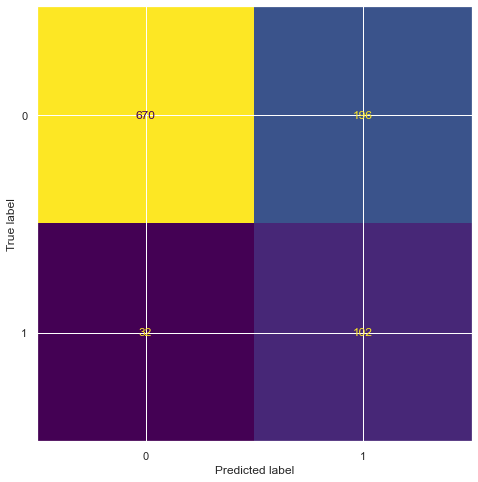

In [46]:
pipe_lr = make_pipeline(mct,LogisticRegression(C=0.1,class_weight="balanced"))

pipe_lr.fit(X_train,y_train)

ConfusionMatrixDisplay.from_estimator(pipe_lr,X_test,y_test,colorbar=False,)

In [47]:
print(classification_report(y_test, pipe_lr.predict(X_test)))


              precision    recall  f1-score   support

           0       0.95      0.77      0.85       866
           1       0.34      0.76      0.47       134

    accuracy                           0.77      1000
   macro avg       0.65      0.77      0.66      1000
weighted avg       0.87      0.77      0.80      1000



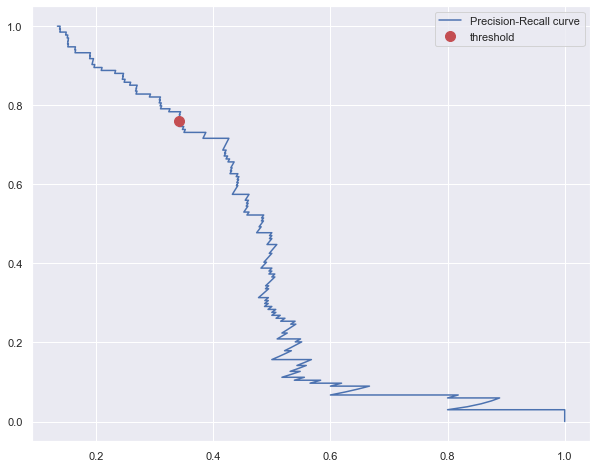

In [48]:
# Precision Recall curve
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(
    y_test, pipe_lr.predict_proba(X_test)[:, 1])


plt.plot(precision, recall, label="Precision-Recall curve")


plt.plot(
    precision_score(y_test, pipe_lr.predict(X_test)),
    recall_score(y_test, pipe_lr.predict(X_test)),
    "or",
    markersize=10,
    label="threshold"
)

plt.legend(loc='best')


In [49]:
# average precision score
from sklearn.metrics import average_precision_score

print("Average precision of logistic regression: %.3f" %
      average_precision_score(y_test, pipe_lr.predict_proba(X_test)[:, 1]))

Average precision of logistic regression: 0.456


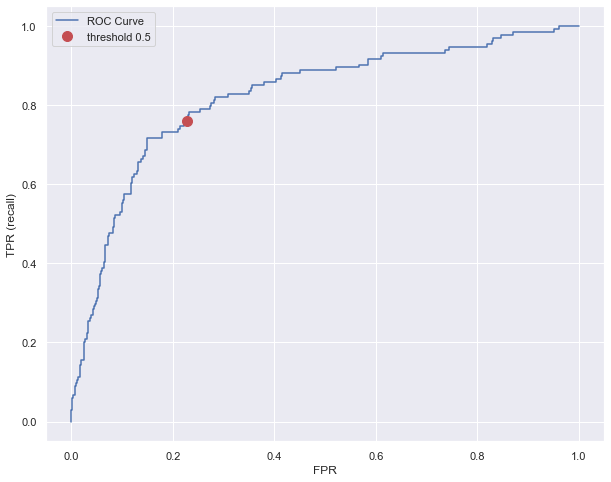

In [50]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, pipe_lr.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

default_threshold = np.argmin(np.abs(thresholds - 0.5))

plt.plot(
    fpr[default_threshold],
    tpr[default_threshold],
    "or",
    markersize=10,
    label="threshold 0.5",
)
plt.legend(loc="best")


In [51]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, pipe_lr.predict_proba(X_test)[:, 1])
print("AUC Score: %0.3f" % auc)

AUC Score: 0.823


<br><br><br><br>

### Exercise 3: Regression metrics <a name="3"></a>
<hr> 


For this exercise, we'll use [California housing dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) from `sklearn datasets`. The code below loads the dataset.  

In [52]:
from sklearn.datasets import fetch_california_housing

housing_df = fetch_california_housing(as_frame=True).frame

### 3.1: Data spitting and exploration 
rubric={points:4}

**Your tasks:**

1. Split the data into train (80%) and test (20%) splits. 
2. Explore the train split. Do you need to apply any transformations on the data? If yes, create a preprocessor with the appropriate transformations. 
3. Separate `X` and `y` in train and test splits. 

In [53]:
df_train, df_test = train_test_split(housing_df, test_size=0.2)
df_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
2389,3.1736,16.0,5.705305,1.082515,1467.0,2.882122,37.00,-119.48,1.11800
7181,2.8542,34.0,3.858779,1.045802,1164.0,4.442748,34.04,-118.19,1.46900
3225,3.3681,18.0,5.410377,0.952830,717.0,3.382075,36.30,-119.66,0.70500
19513,2.8194,43.0,4.665414,0.902256,612.0,2.300752,37.62,-121.03,0.81300
14649,3.2679,30.0,3.900000,1.125000,77.0,1.925000,32.77,-117.20,1.37500
...,...,...,...,...,...,...,...,...,...
7144,2.2813,41.0,3.842932,0.994764,565.0,2.958115,34.02,-118.13,1.92000
18168,3.5861,16.0,3.261745,1.143816,1479.0,1.418025,37.37,-122.03,5.00001
9292,4.3182,36.0,5.626250,1.040000,2196.0,2.745000,38.01,-122.45,2.52700
15692,8.0755,52.0,6.253823,1.079511,722.0,2.207951,37.79,-122.44,5.00001


In [54]:
cols = ["MedInc", "HouseAge", "AveRooms", "AveBedrms",
        "Population", "AveOccup", "Latitude", "Longitude"]

ct = make_column_transformer(
    (StandardScaler(),cols)
)

In [55]:
X_train,y_train = df_train.drop(columns=["MedHouseVal"]),df_train["MedHouseVal"]
X_test,y_test = df_test.drop(columns=["MedHouseVal"]),df_test["MedHouseVal"]

<br><br>

### 3.2 Baseline: DummyRegressor 
rubric={points:2}

**Your tasks:**
1. Carry out cross-validation using `DummyRegressor` with default scoring. 
2. What metric is used for scoring by default? 

In [58]:
dr = DummyRegressor()

pipe_dc = make_pipeline(ct,dr)

scores = cross_validate(pipe_dc,X_train,y_train)

pd.DataFrame(scores)

,fit_time,score_time,test_score
0,0.013741,0.003009,-0.000559
1,0.007140,0.001009,-0.000138
2,0.008041,0.005510,-0.000736
3,0.002534,0.007616,-0.000538
4,0.008030,0.002083,-0.000247


In [59]:
# this score will give us R2 score error. 
# by default scoring in cross validate is Accuracy 

<br><br>

### 3.3 Different regressors
rubric={points:8}

In this exercise, we are going to use [`RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) model which we haven't looked into yet. At this point you should feel comfortable using models with our usual ML workflow even if you don't know the details. We'll talk about `RandomForestRegressor` later in the course.  

The code below defines a custom scorer called `mape_scorer` and creates dictionaries for different regressors (`models`) and different scoring metrics (`score_types_reg`). 

**Your tasks:**

1. Using the `models` and the evaluation metrics `score_types_reg` in the code below, carry out cross-validation with each model, by passing the evaluation metrics to `scoring` argument of `cross_validate`. Use a pipeline with the model as an estimator if you are applying any transformations. 
2. Show results as a dataframe. 
3. Interpret the results. How do the models compare to the baseline? Which model seems to be performing well with different metrics? 


In [60]:
def mape(true, pred):
    return 100.0 * np.mean(np.abs((pred - true) / true))


# make a scorer function that we can pass into cross-validation
mape_scorer = make_scorer(mape, greater_is_better=False)

models = {
    "Ridge": Ridge(),
    "Random Forest": RandomForestRegressor(),
}

score_types_reg = {
    "neg_mean_squared_error": "neg_mean_squared_error",
    "neg_root_mean_squared_error": "neg_root_mean_squared_error",
    "neg_mean_absolute_error": "neg_mean_absolute_error",
    "r2": "r2",
    "mape_scorer": mape_scorer,
}

In [62]:
results_dict = {}

for m in models:
    model = make_pipeline(ct,models[m])
    scores = cross_validate(model,X_train,y_train,scoring=score_types_reg)
    for i in scores:
        scores[i] = scores[i].mean()
    results_dict[m] = scores

In [63]:
results = pd.DataFrame(results_dict)
results

,Ridge,Random Forest
fit_time,0.010474,15.412054
score_time,0.006179,0.099846
test_neg_mean_squared_error,-0.521468,-0.260335
test_neg_root_mean_squared_error,-0.722034,-0.510198
test_neg_mean_absolute_error,-0.529512,-0.333562
test_r2,0.607577,0.804033
test_mape_scorer,-31.797516,-18.845685


<br><br>

### (Optional) 3.4 Hyperparameter optimization 
rubric={points:1}

**Your tasks:**
1. Carry out hyperparameter optimization using `RandomizedSearchCV` and `Ridge` with the following `param_dist`. The `alpha` hyperparameter of `Ridge` controls the fundamental tradeoff. Choose the metric of your choice for hyperparameter optimization. 
2. Are you getting better scores compared to the default values?
- Answer:   As we can see above, Optimized Score is -0.1052 and Default Score is -0.1059 ( Here, it is giving R2 Score by Default )

In [64]:
from scipy.stats import loguniform

param_dist = {"ridge__alpha": loguniform(1e-3, 1e3)}


pipe = make_pipeline(ct,Ridge())
rcv = RandomizedSearchCV(pipe,param_distributions=param_dist,n_iter=1000)
rcv.fit(X_train,y_train)


RandomizedSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('standardscaler',
                                                                               StandardScaler(),
                                                                               ['MedInc',
                                                                                'HouseAge',
                                                                                'AveRooms',
                                                                                'AveBedrms',
                                                                                'Population',
                                                                                'AveOccup',
                                                                                'Latitude',
                                                                                'Longitude'])])),
                                             ('ridge', Ridge())]),
                   n_iter=1000,
                   param_distributions={'ridge__alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001990DF91640>})

In [65]:
# Best Params for Above Model
print("The Best Parameter for Above Model: ", rcv.best_params_)
print("The Best  Score for Above Model: ", rcv.best_score_)

The Best Parameter for Above Model:  {'ridge__alpha': 0.0010044494767379568}
The Best  Score for Above Model:  0.607579085848881


In [67]:
pipe_default = make_pipeline(ct,Ridge())

scores = cross_validate(pipe_default,X_train,y_train,return_train_score=True)
df_scores  = pd.DataFrame(scores)
df_scores 

,fit_time,score_time,test_score,train_score
0,0.010699,0.000000,0.611031,0.610358
1,0.011138,0.000000,0.621579,0.605910
2,0.010154,0.005034,0.589636,0.615681
3,0.011192,0.000000,0.611791,0.609957
4,0.010221,0.000000,0.603850,0.611955


In [68]:
scores_mean = {}

for i in scores:
    scores_mean[i] = scores[i].mean()

pd.DataFrame([scores_mean])

,fit_time,score_time,test_score,train_score
0,0.010681,0.001007,0.607577,0.610772


<br><br>

### 3.5 Test results
rubric={points:4}

**Your tasks:**

1. Try the best model on the test set.
2. Briefly comment on the results. (1 to 2 sentences) 

In [69]:
rcv.best_estimator_.score(X_test,y_test)

0.5839078436969585

<br><br>

### 3.6 Model interpretation  
rubric={points:4}

Ridge is a linear model and it learns coefficients associated with each feature during `fit()`. 

**Your tasks:**

1. Visualize coefficients learned by the `Ridge` model above as a pandas dataframe with two columns: features and coefficients. If you attempted 3.4, use the `Ridge` model with best hyperparameters. Otherwise use the `Ridge` model with default hyperparameters. 
2. Increasing which feature values would result in higher housing price? 

In [70]:
ridge_best = rcv.best_estimator_.get_params()["ridge"]

data = {"Features":cols,"Coeffecients":ridge_best.coef_}
pd.DataFrame(data)

,Features,Coeffecients
0,MedInc,0.849492
1,HouseAge,0.119953
2,AveRooms,-0.296863
3,AveBedrms,0.342880
4,Population,-0.002453
5,AveOccup,-0.040253
6,Latitude,-0.892797
7,Longitude,-0.867967


Here, increasing the Feature Medinc will significntly result in higher housing price because of its coefficient value which is all in features  0.84.

<br><br>